In [2]:
!pip install openpyxl
!pip install matplotlib

     ---------------------------------------- 0.0/249.8 kB ? eta -:--:--
     ------------------------------------- 249.8/249.8 kB 16.0 MB/s eta 0:00:00
  Using cached et_xmlfile-1.1.0-py3-none-any.whl (4.7 kB)


#### 수출입무역통계 사이트 에서 데이터 입수
-----------------------------------
https://unipass.customs.go.kr/ets/  

In [71]:
import pandas as pd
import numpy as np
import  openpyxl
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [72]:
# matplotlib 에서 한글이 깨진다. 한글폰트 세팅이 필요함
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = r"C:\Windows\Fonts\H2GTRM.TTF"
# font_path = r"C:\Users\swkao\AppData\Local\Microsoft\Windows\Fonts\D2CodingBold-Ver1.3.2-20180524-ligature.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

# 마이너스 깨짐현상
matplotlib.rcParams['axes.unicode_minus'] = False

In [92]:
df = pd.read_excel("./국가별수출입실적.xlsx")
# df.unique(df['기간'])
# df["기간"] = pd.to_datetime(df["기간"])
df['기간'] = df['기간'].astype(str)
df['연도']  = df['기간'].str.split('.').str[0]
df['월']  = df['기간'].str.split('.').str[1]
df['월'] = df['월'].apply(lambda row : row.zfill(2))
df["수출건수"] = df["수출건수"].str.replace(',','').astype(float)
df["수출금액"] = df["수출금액"].str.replace(',','').astype(float)
df["수입건수"] = df["수입건수"].str.replace(',','').astype(float)
df["수입금액"] = df["수입금액"].str.replace(',','').astype(float)
df["무역수지"] = df["무역수지"].str.replace(',','').astype(float)
# df = df.set_index('기간') 
# df.head()

##### 대중국 무역수지 추이

<Axes: xlabel='연도,월'>

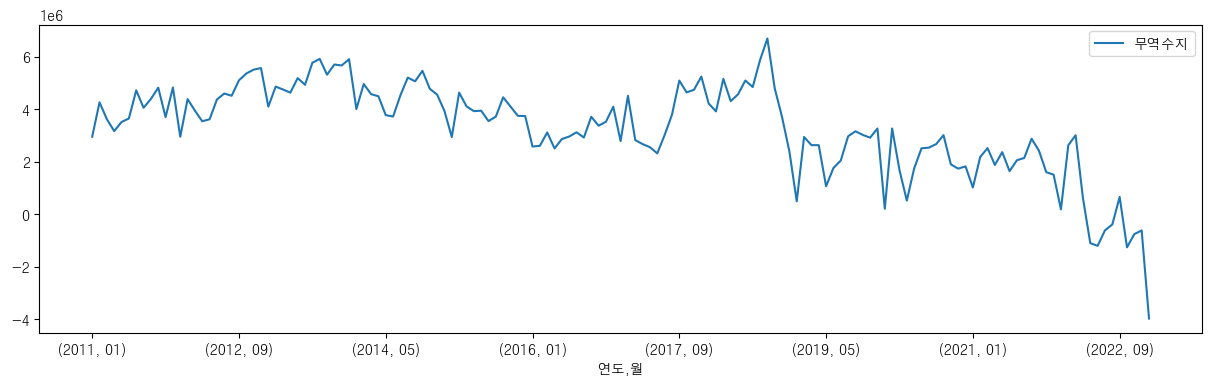

In [93]:
# pandas plot 이용하여  chart 그리기
df_sub1 = df[df['국가명'] == '중국']
df_sub1 = df_sub1.set_index(['연도','월'])[['무역수지']]
df_sub1.plot(figsize=(15,4))

C:\Users\swkao\AppData\Local\Temp\ipykernel_7020\348594771.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub2['년월'] = df_sub2['연도'] + '.' + df_sub2['월']


<Axes: xlabel='년월', ylabel='무역수지'>

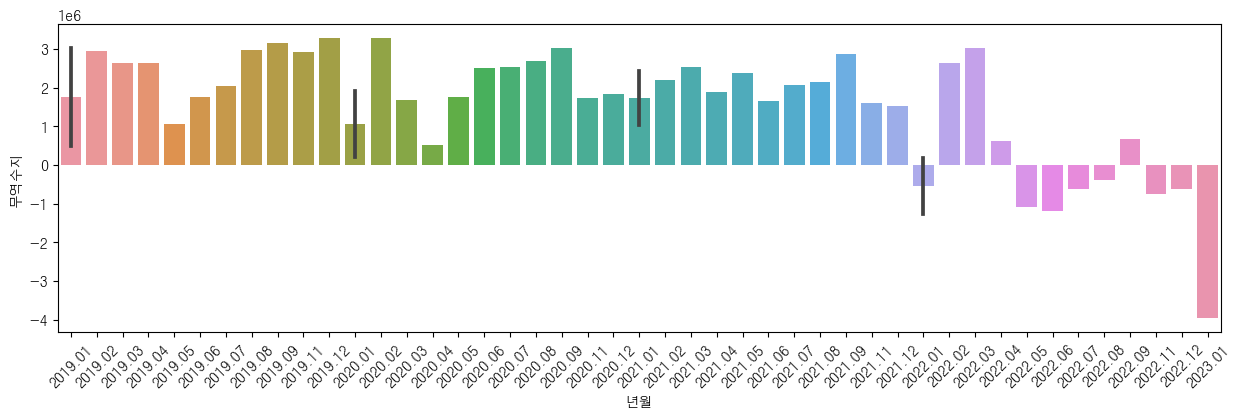

In [119]:
# seaborn 이용하여 chart 그리기
df_sub2 = df[df['국가명'] == '중국']
df_sub2['년월'] = df_sub2['연도'] + '.' + df_sub2['월']
df_sub2 = df_sub2.loc[df_sub2['년월'] >=  '2019.01']
plt.figure(figsize=(15,4))
plt.xticks(rotation = 45)
sns.barplot(data=df_sub2, x='년월', y='무역수지')

C:\Users\swkao\AppData\Local\Temp\ipykernel_7020\3950409728.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub3['년월'] = df_sub3['연도'] + '.' + df_sub3['월']


<Axes: xlabel='년월', ylabel='무역수지'>

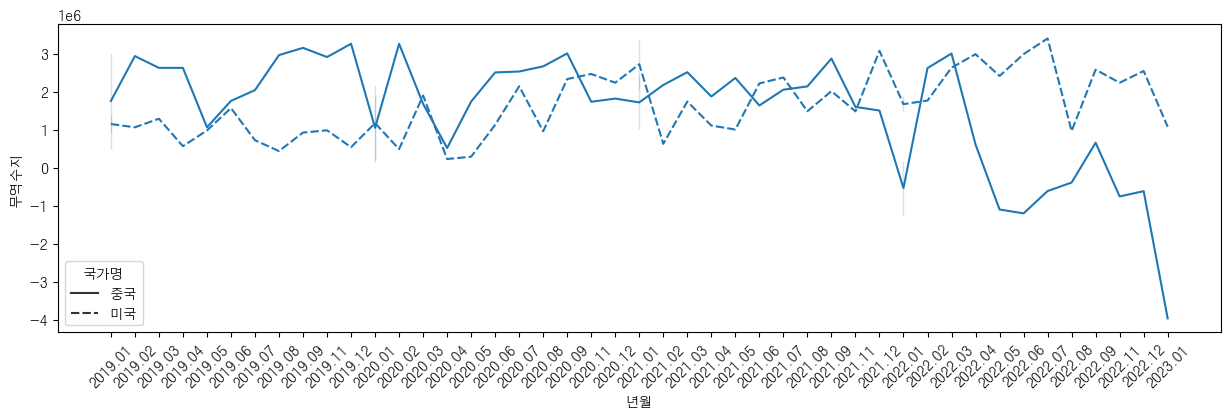

In [120]:
# 미국과 중국의 무역수지 비교차트 그리기
# 국가별로 별도의 선으로 표현하기 위하여 style 사용
df_sub3 = df[df['국가명'].isin(['중국','미국'])]
df_sub3['년월'] = df_sub3['연도'] + '.' + df_sub3['월']
df_sub3 = df_sub3.loc[df_sub3['년월'] >=  '2019.01']
plt.figure(figsize=(15,4))
plt.xticks(rotation = 45)
sns.lineplot(data=df_sub3, x='년월', y='무역수지', style='국가명')

C:\Users\swkao\AppData\Local\Temp\ipykernel_7020\3117874986.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub3['년월'] = df_sub3['연도'] + '.' + df_sub3['월']


<Axes: xlabel='년월', ylabel='무역수지'>

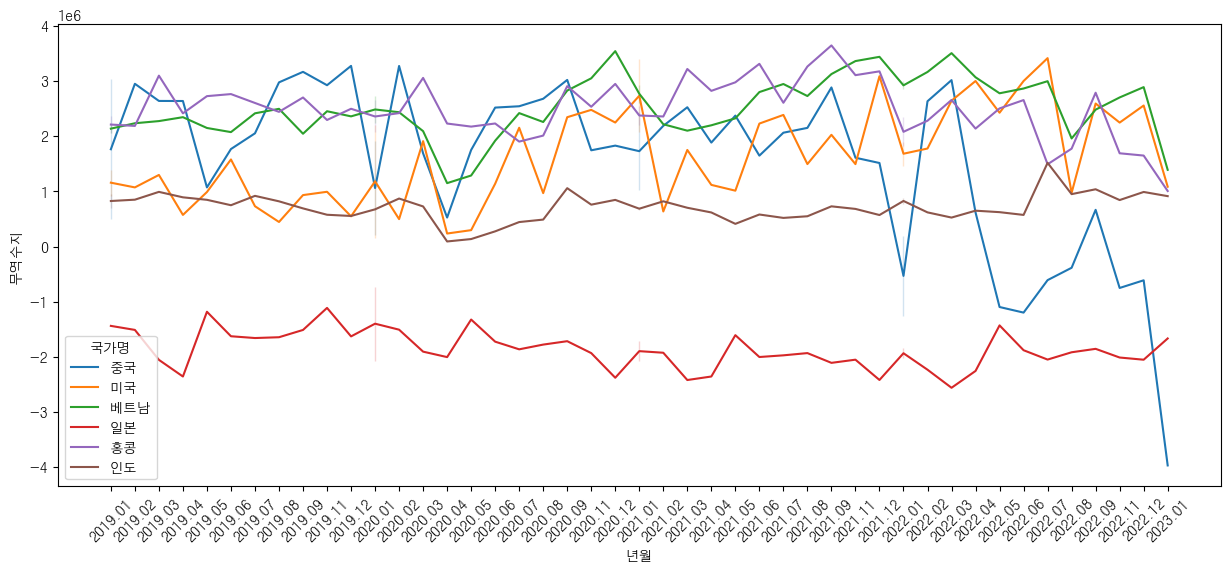

In [121]:
# 주요 주변국의 무역수지 같은 chart 에 표시
# 국가별 별도라인을 표시하기 위하여 hue 이용
df_sub3 = df[df['국가명'].isin(['중국','미국','일본','인도','베트남','홍콩'])]
df_sub3['년월'] = df_sub3['연도'] + '.' + df_sub3['월']
df_sub3 = df_sub3.loc[df_sub3['년월'] >=  '2019.01']
plt.figure(figsize=(15,6))
plt.xticks(rotation = 45)
sns.lineplot(data=df_sub3, x='년월', y='무역수지', hue='국가명')

<Axes: xlabel='년월', ylabel='무역수지'>

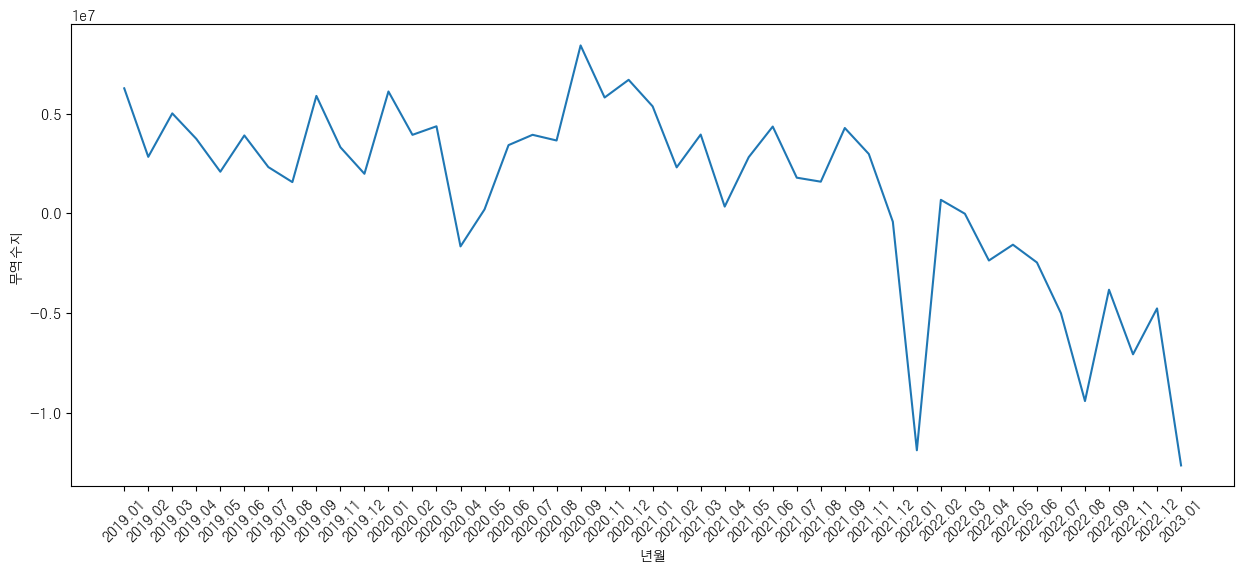

In [138]:
# 년도별 총 무역수지 추이
df_sub4 =  df.groupby(['연도','월']).agg({'무역수지':'sum'})
df_sub4 = df_sub4.reset_index()
df_sub4['년월'] = df_sub4['연도'] + '.' + df_sub4['월']
df_sub4 = df_sub4.loc[df_sub4['년월'] >=  '2019.01']
plt.figure(figsize=(15,6))
plt.xticks(rotation = 45)
sns.lineplot(data=df_sub4, x='년월', y='무역수지')